# Homework 4: Data Visualization
- **Name**:  SRINATH SENTHILVELAN
- **UB Username**: senthilv@buffalo.edu
- **UB Person Number**:  50485182

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

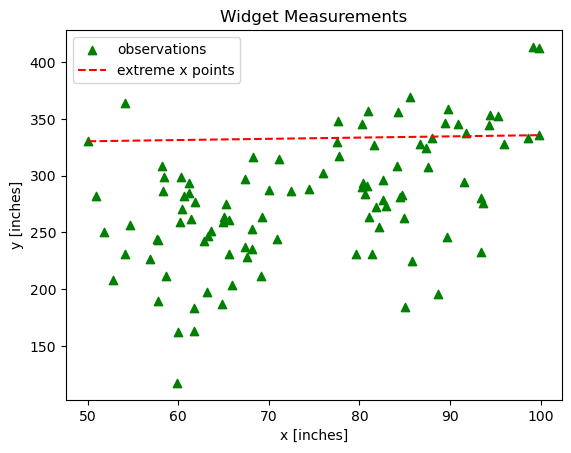

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

#Read csv file
data = pd.read_csv('scatter_data.csv', comment='%', names = ['x','y'])


#Scatter Plot
plt.scatter(data['x'], data['y'], marker='^', color='green', label='observations')
x = data['x'];
y = data['y'];

leftmost = min(x)
rightmost = max(x)

#Extreme points plot
plt.plot([leftmost, rightmost], [y[x.idxmin()], y[x.idxmax()]], linestyle='--', color='red', label='extreme x points')


#Plot label,title and Legend
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')


plt.legend()

#Display
plt.show()


### Problem 2 - Histogram

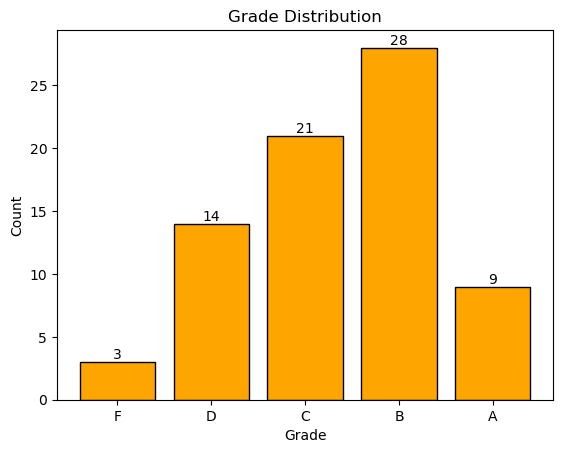

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

#Read csv file
data = pd.read_csv("student_grades.csv", comment='%', names=['studentID', 'avgScore'])

#Grades and their count
grades = ['F', 'D', 'C', 'B', 'A']
positions = range(5)
count = [len(data[(data['avgScore'] < 60)]),len(data[(data['avgScore'] >= 60) & (data['avgScore'] < 70)]),len(data[(data['avgScore'] >= 70) & (data['avgScore'] < 80)]),
                   len(data[(data['avgScore'] >= 80) & (data['avgScore'] < 90)]),len(data[(data['avgScore'] >= 90)])]

#Bar Plot
plt.bar(positions,count, color='orange', edgecolor='black')

#Plot labels, title and axes
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')
plt.xticks(positions, grades)

#Annotation
for i, j in enumerate(count):
    plt.text(i, j, str(j), fontsize=10, ha='center', va='bottom')

#Display
plt.show()


### Problem 3 - Barplot and Boxplot in the Same Figure

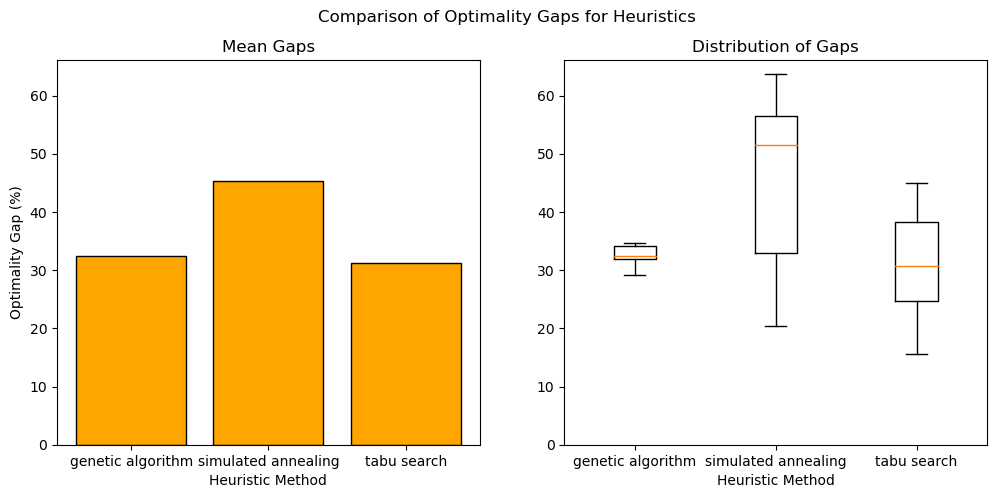

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Read csv file
data = pd.read_csv("solution_data.csv", comment="%", names=['Problem','SolnMethod', 'Value']) 

#Groupby Problem ID
grouped_data = data.groupby('Problem')
optimality_gaps = pd.DataFrame()

#Calculate optimality gaps for each row of each problem ID
for name, group in grouped_data:
    optimal_OFV = group[group['SolnMethod'] == 'optimal']['Value'].values
    group['Optimality Gap'] = ((optimal_OFV - group['Value']) / optimal_OFV) * 100
    optimality_gaps = pd.concat([optimality_gaps, group], ignore_index=True)

#Add optimality gap to csv file data
data['Optimality Gap'] = optimality_gaps['Optimality Gap']
 

#Subplots
fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")


#Groupby Solution Method and calculate mean optimality gap 
method_gaps = data[data['SolnMethod'] != 'optimal'].groupby('SolnMethod')['Optimality Gap'].mean()


#Bar Plot
plot1.bar(method_gaps.index, method_gaps.values, color='orange', edgecolor='black')
plot1.set_xlabel('Heuristic Method')  
plot1.set_ylabel('Optimality Gap (%)')
plot1.set_title('Mean Gaps')


#Box Plot
plot2.boxplot([data[data['SolnMethod'] == 'genetic algorithm']['Optimality Gap'].values,
                 data[data['SolnMethod'] == 'simulated annealing']['Optimality Gap'].values,
                 data[data['SolnMethod'] == 'tabu search']['Optimality Gap'].values], 
                labels=['genetic algorithm', 'simulated annealing', 'tabu search'])
plot2.set_xlabel('Heuristic Method')
plot2.set_title('Distribution of Gaps')




#Y limits
extreme_min = min(plot1.get_ylim()[0], plot2.get_ylim()[0])
extreme_max = max(plot1.get_ylim()[1], plot2.get_ylim()[1])
plot1.set_ylim([extreme_min, extreme_max])
plot2.set_ylim([extreme_min, extreme_max])

#Display
plt.show()    


# Part 2 - Explore New Plot Types


For Part-2 I have opted for a Violin Plot using Seaborn to visualize the distribution of petal lengths of Setosa, Versicolor, and Virginica flowers which are three species of the iris flowers. 

I chose Violin plot for this type of data because it not only shows the distribution of values but also the density of data points at different values. Although the violin plot may look slightly difficult to comprehend, it's pleasing to the eye.



URL of Example Code: https://seaborn.pydata.org/examples/wide_form_violinplot.html

URL of sample data: Inbuilt seaborn data


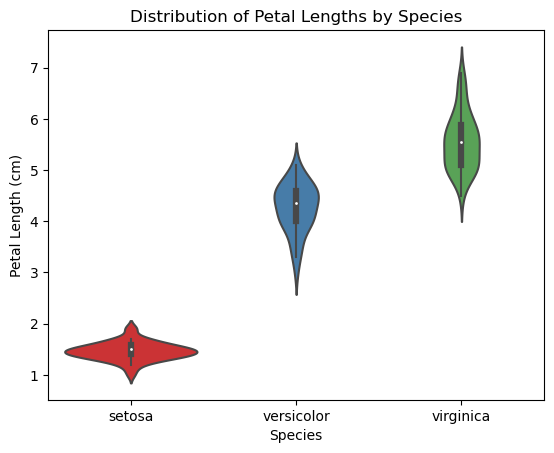

In [27]:

import seaborn as sns
import matplotlib.pyplot as plt

#Load Dataset
iris = sns.load_dataset("iris")

#Violin Plot
sns.violinplot(x="species", y="petal_length", data=iris, palette="Set1")

#plot label, title
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.title("Distribution of Petal Lengths by Species")

#Display
plt.show()


Here we are able to compare the distribution of petal lengths across the 3 different species effectively. The width of the violin plot represents the density, and the plot's shape provides insights into the distribution characteristics of the data. Again, It's a visually appealing and informative way to understand the petal length variations among these iris species. 

The data also contains sepal properties of the flower. And we can create different subplots to visualize the difference in the sepal width and sepal length amongst the 3 flower species. Also, the color palette can be changed by using different set (set 1, set2, set3) of colors.